In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Прочитать данные из файла COVID-19 Cases.csv

In [4]:
covid_df = pd.read_csv("COVID-19 Cases.csv")

Вывести первые 5 строк

In [5]:
covid_df.head()

,Date,Country_Region,Province_State,Difference,Prep_Flow_Runtime,Latest_Date,Case_Type,Cases,Lat,Long
0,3/9/2020,India,NaN,0,3/24/2020 9:39:03 AM,3/23/2020,Deaths,0,21.0,78.0
1,3/8/2020,India,NaN,0,3/24/2020 9:39:03 AM,3/23/2020,Deaths,0,21.0,78.0
2,3/7/2020,India,NaN,0,3/24/2020 9:39:03 AM,3/23/2020,Deaths,0,21.0,78.0
3,3/6/2020,India,NaN,0,3/24/2020 9:39:03 AM,3/23/2020,Deaths,0,21.0,78.0
4,3/5/2020,India,NaN,0,3/24/2020 9:39:03 AM,3/23/2020,Deaths,0,21.0,78.0


Достать данные где данные подходят под критерии:
* Difference больше 0
* Case_Type равен Confirmed
* Country_Region равен Italy

In [6]:
filtered_df = covid_df[(covid_df['Difference'] > 0) & 
                       (covid_df['Case_Type'] == 'Confirmed') & 
                       (covid_df['Country_Region'] == 'Italy')]

filtered_df.head()

,Date,Country_Region,Province_State,Difference,Prep_Flow_Runtime,Latest_Date,Case_Type,Cases,Lat,Long
28975,3/9/2020,Italy,NaN,1797,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,9172,43.0,12.0
28976,3/8/2020,Italy,NaN,1492,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,7375,43.0,12.0
28977,3/7/2020,Italy,NaN,1247,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,5883,43.0,12.0
28978,3/6/2020,Italy,NaN,778,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,4636,43.0,12.0
28979,3/5/2020,Italy,NaN,769,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,3858,43.0,12.0


Отсортировать данные по убыванию количества Cases

In [7]:
sorted_df = filtered_df.sort_values(by='Cases', ascending=False)
sorted_df.head()

,Date,Country_Region,Province_State,Difference,Prep_Flow_Runtime,Latest_Date,Case_Type,Cases,Lat,Long
28982,3/23/2020,Italy,NaN,4789,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,63927,43.0,12.0
28983,3/22/2020,Italy,NaN,5560,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,59138,43.0,12.0
28984,3/21/2020,Italy,NaN,6557,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,53578,43.0,12.0
28985,3/20/2020,Italy,NaN,5986,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,47021,43.0,12.0
28987,3/19/2020,Italy,NaN,5322,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,41035,43.0,12.0


Теперь мы хотим визуально отобразить распределение значений в столбце «Difference». Мы можем передать массив значений в график hist()

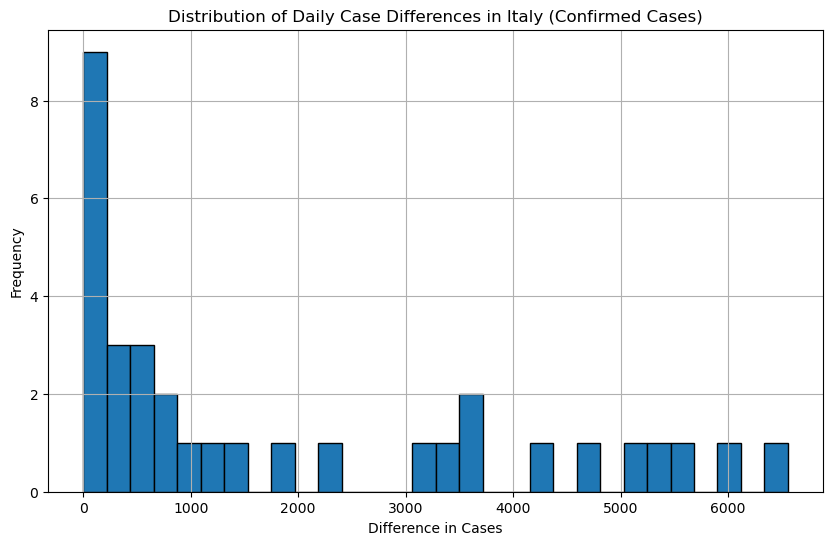

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(sorted_df['Difference'], bins=30, edgecolor='black')
plt.title('Distribution of Daily Case Differences in Italy (Confirmed Cases)')
plt.xlabel('Difference in Cases')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Вывести статистики столбца Difference одной функцией
 * count
* mean 
* std  
* min  
* 25%  
* 50%  
* 75%  
* max  

In [9]:
summary_statistics = sorted_df['Difference'].describe()

summary_statistics

count      33.000000
mean     1937.181818
std      2132.965299
min         1.000000
25%       202.000000
50%       778.000000
75%      3526.000000
max      6557.000000
Name: Difference, dtype: float64

Достать данные где данные подходят под критерии:
Difference больше 0
Case_Type равен Confirmed
Country_Region равен или Italy или Spain или Germany 

In [10]:
df_results = covid_df[(covid_df['Difference'] > 0) & 
                       (covid_df['Case_Type'] == 'Confirmed') & 
                       (covid_df['Country_Region'].isin(['Italy', 'Spain', 'Germany']))]

Вывести первые 5 строк

In [11]:
df_results.head()

,Date,Country_Region,Province_State,Difference,Prep_Flow_Runtime,Latest_Date,Case_Type,Cases,Lat,Long
20191,3/9/2020,Germany,NaN,136,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,1176,51.0,9.0
20192,3/8/2020,Germany,NaN,241,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,1040,51.0,9.0
20193,3/7/2020,Germany,NaN,129,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,799,51.0,9.0
20194,3/6/2020,Germany,NaN,188,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,670,51.0,9.0
20195,3/5/2020,Germany,NaN,220,3/24/2020 9:39:03 AM,3/23/2020,Confirmed,482,51.0,9.0


Изучить функцию boxplot

Построить диаграмму используя столбец Difference по  Country_Region

Сделать выводы исходя из полученной диаграммы

<Figure size 1000x600 with 0 Axes>

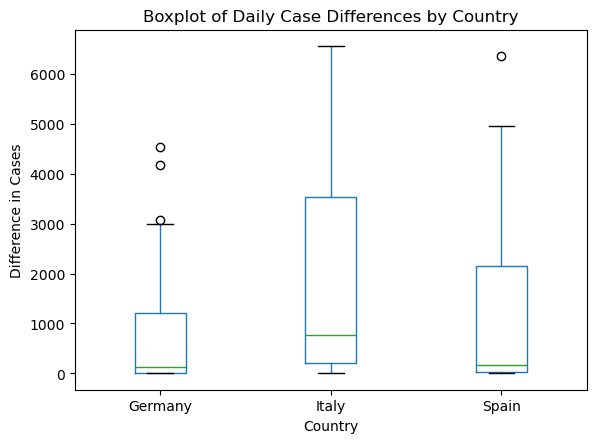

In [12]:
plt.figure(figsize=(10, 6))
df_results.boxplot(column='Difference', by='Country_Region', grid=False)
plt.title('Boxplot of Daily Case Differences by Country')
plt.suptitle('')
plt.xlabel('Country')
plt.ylabel('Difference in Cases')
plt.show()

Используя plt.scatter сравнить Cases попарно у регионов

Найти регион с наибольшей скоростью роста

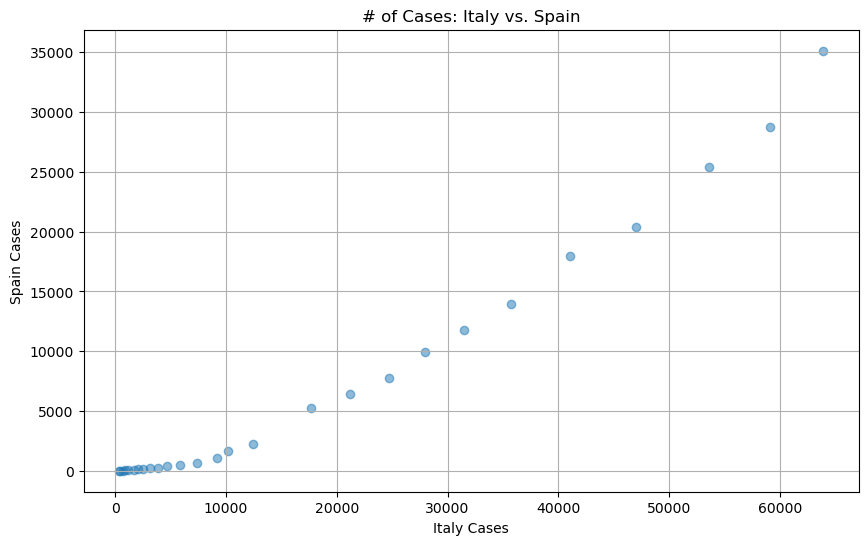

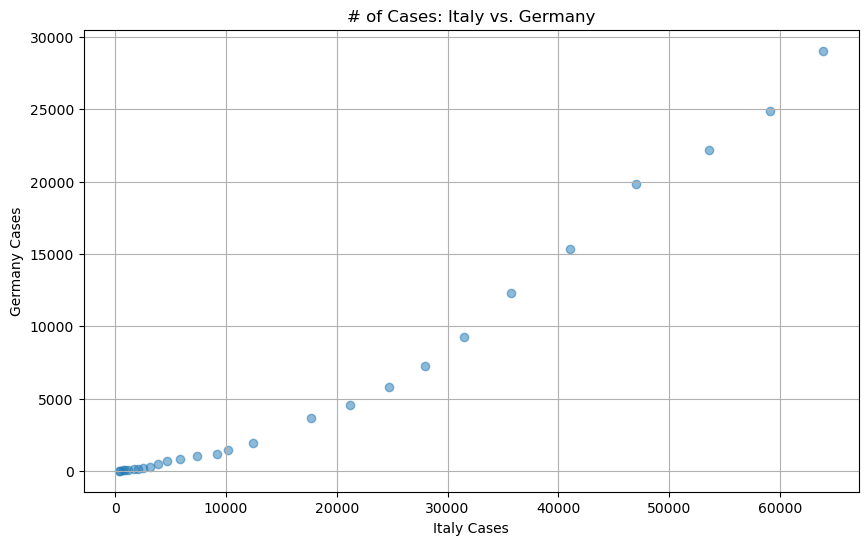

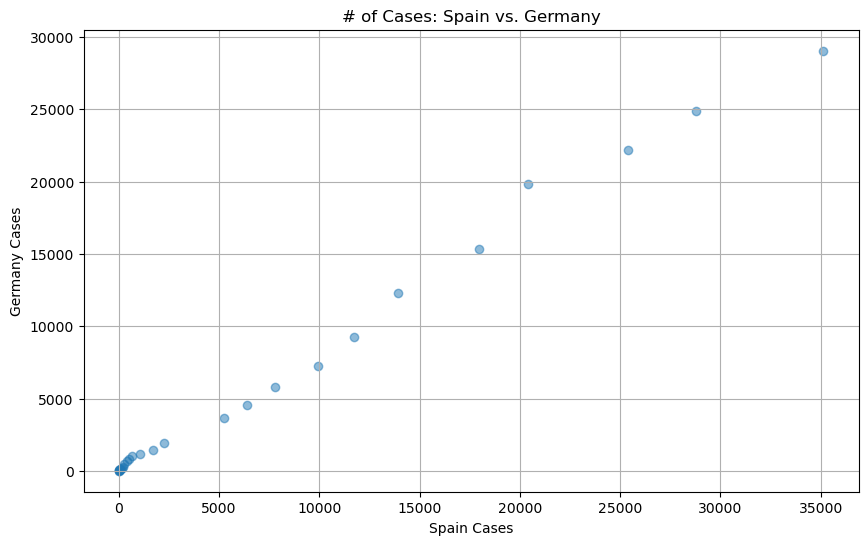

In [13]:
italy_cases_aligned = df_results[df_results['Country_Region'] == 'Italy'].set_index('Date')['Cases']
spain_cases_aligned = df_results[df_results['Country_Region'] == 'Spain'].set_index('Date')['Cases']
germany_cases_aligned = df_results[df_results['Country_Region'] == 'Germany'].set_index('Date')['Cases']

aligned_cases_df = pd.DataFrame({
    'Italy': italy_cases_aligned,
    'Spain': spain_cases_aligned,
    'Germany': germany_cases_aligned
}).dropna()

plt.figure(figsize=(10, 6))
plt.scatter(aligned_cases_df['Italy'], aligned_cases_df['Spain'], alpha=0.5)
plt.title('# of Cases: Italy vs. Spain')
plt.xlabel('Italy Cases')
plt.ylabel('Spain Cases')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(aligned_cases_df['Italy'], aligned_cases_df['Germany'], alpha=0.5)
plt.title('# of Cases: Italy vs. Germany')
plt.xlabel('Italy Cases')
plt.ylabel('Germany Cases')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(aligned_cases_df['Spain'], aligned_cases_df['Germany'], alpha=0.5)
plt.title('# of Cases: Spain vs. Germany')
plt.xlabel('Spain Cases')
plt.ylabel('Germany Cases')
plt.grid(True)
plt.show()

In [14]:
aligned_cases_df['Italy_Growth_Rate'] = aligned_cases_df['Italy'].pct_change().fillna(0) * 100
aligned_cases_df['Spain_Growth_Rate'] = aligned_cases_df['Spain'].pct_change().fillna(0) * 100
aligned_cases_df['Germany_Growth_Rate'] = aligned_cases_df['Germany'].pct_change().fillna(0) * 100

average_growth_rates = aligned_cases_df[['Italy_Growth_Rate', 'Spain_Growth_Rate', 'Germany_Growth_Rate']].mean()

highest_growth_rate_country = average_growth_rates.idxmax()

average_growth_rates, highest_growth_rate_country

(Italy_Growth_Rate      112.899308
 Spain_Growth_Rate      725.407588
 Germany_Growth_Rate    518.999090
 dtype: float64,
 'Spain_Growth_Rate')